## Import necessary module

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Reading file 

In [329]:
infile=r"C:\Graduate Courses\Fall 2019\STA 5731\Assignment_2\dataset-har-PUC-Rio-ugulino\Project2_data.csv"
df=pd.read_csv(infile,sep=",")
df.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,162,75,286,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147.0,sitting
1,debora,Woman,46,162,75,286,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145.0,sitting
2,debora,Woman,46,162,75,286,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144.0,sitting
3,debora,Woman,46,162,75,286,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142.0,sitting
4,debora,Woman,46,162,75,286,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143.0,sitting


In [330]:
#df.dtypes

## Temporal dependency related variables

In [331]:
columns =['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3',
       'x4', 'y4', 'z4'] 
user=df['user'].unique()


In [332]:
data=pd.DataFrame()
w=8  #window size
for u in user:
    df1=df[(df['user']==u)]
    for i in columns:
        df1[i+'_mean']=df1[i].rolling(w).mean() 
        df1[i+'_std']=df1[i].rolling(w).std()
    data=data.append(df1)

C:\Users\rezac\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rezac\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [333]:
data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,...,y3_mean,y3_std,z3_mean,z3_std,x4_mean,x4_std,y4_mean,y4_std,z4_mean,z4_std
0,debora,Woman,46,162,75,286,-3,92,-63,-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,debora,Woman,46,162,75,286,-3,94,-64,-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,debora,Woman,46,162,75,286,-1,97,-61,-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,debora,Woman,46,162,75,286,-2,96,-57,-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,debora,Woman,46,162,75,286,-1,96,-61,-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Frequnecy of the class

Text(0.5, 0, 'Acitivity Types')

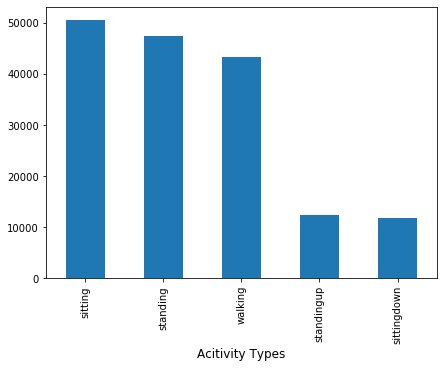

In [334]:
fig, ax = plt.subplots(figsize=(7,5))
data['class'].value_counts().plot(ax=ax, kind='bar')
plt.xlabel('Acitivity Types', size=12)

# Data Cleaning and Preprocessing 

In [335]:
class_names=list(data['class'].unique())
class_names

['sitting', 'sittingdown', 'standing', 'standingup', 'walking']

In [336]:
data['user'].unique()

array(['debora', 'katia', 'wallace', 'jose_carlos'], dtype=object)

In [337]:
data['gender']=data['gender'].replace({'Woman':1,'Man':2})

In [338]:
data['class']=data['class'].replace({'sitting':0, 'sittingdown':1, 'standing':2, 'standingup':3, 'walking':4})

In [339]:
data['how_tall_in_meters']=pd.to_numeric(data['how_tall_in_meters'])

In [340]:
data=data.dropna(how='any')

In [341]:
len(data)

165597

## Binarized Label 

In [342]:
x_vals=data.copy()

x_vals.drop(['user','class'],1,inplace=True)

y_vals=data['class']

y_vals = label_binarize(y_vals, classes=[0,1, 2,3,4])

n_classes = y_vals.shape[1]

In [343]:
y_vals # 1 vs rest

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [344]:
len(y_vals)

165597

# Naive Bayes

In [345]:
X_train, X_test, Y_train, Y_test = train_test_split(x_vals, y_vals, random_state=0)

In [346]:
len(X_train)

124197

In [347]:
classifier = OneVsRestClassifier(GaussianNB())
model=classifier.fit(X_train, Y_train)
Y_score=model.predict_proba(X_test)

In [348]:
#Y_score

In [349]:
Y_pred=model.predict(X_test)

In [350]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

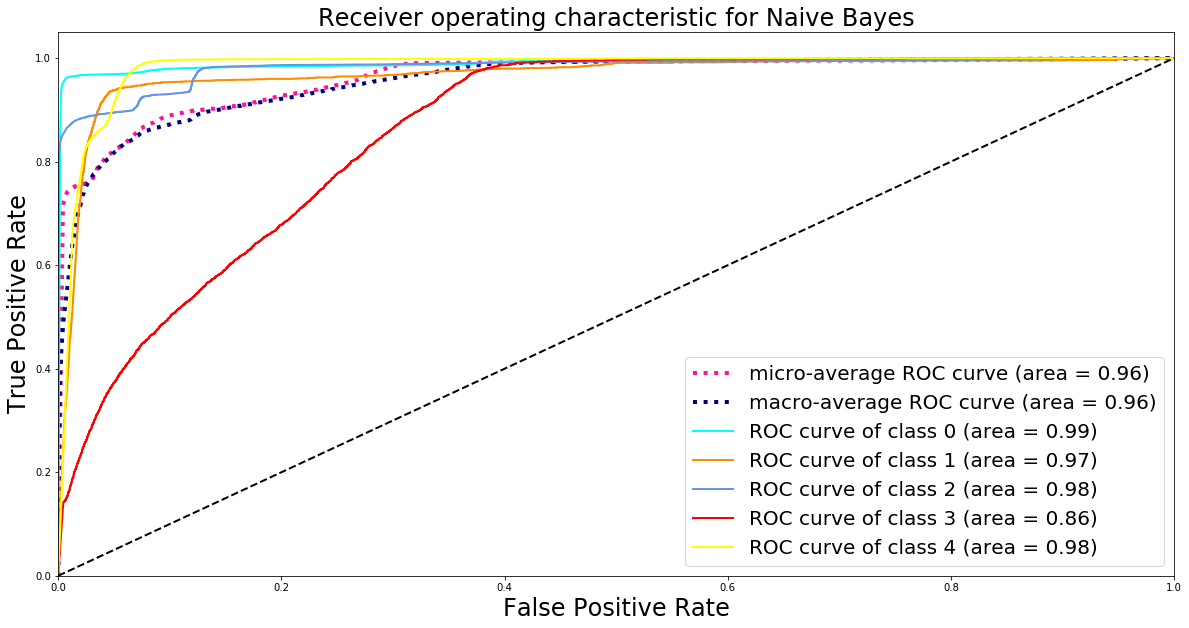

In [351]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Receiver operating characteristic for Naive Bayes',size=24)
plt.legend(loc="lower right", fontsize=20)
plt.show()

In [352]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.5211352657004831


In [353]:
report=classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.99      0.70     12552
           1       0.21      0.97      0.35      2962
           2       0.81      0.93      0.86     11775
           3       0.38      0.36      0.37      3038
           4       0.86      0.93      0.90     11073

   micro avg       0.58      0.91      0.71     41400
   macro avg       0.56      0.84      0.64     41400
weighted avg       0.67      0.91      0.75     41400
 samples avg       0.68      0.91      0.75     41400



C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [357]:
#multilabel_confusion_matrix(Y_test, Y_pred)

# Logistic regression

In [358]:
clf = OneVsRestClassifier(LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial'))

In [359]:
model=clf.fit(X_train,Y_train)

C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

In [360]:
Y_pred=clf.predict(X_test)
Y_score=clf.predict_proba(X_test)

In [361]:
#Y_score

In [362]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

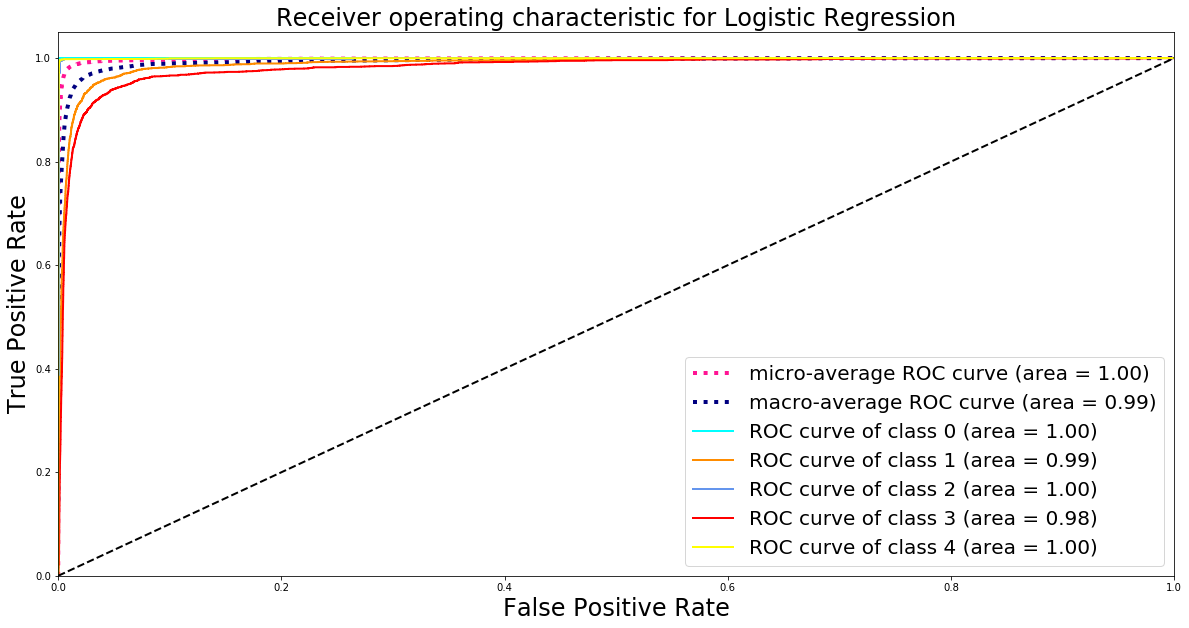

In [363]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Receiver operating characteristic for Logistic Regression',size=24)
plt.legend(loc="lower right", fontsize=20)
plt.show()

In [364]:
report=classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12552
           1       0.87      0.82      0.85      2962
           2       0.99      1.00      0.99     11775
           3       0.86      0.76      0.81      3038
           4       1.00      0.99      1.00     11073

   micro avg       0.98      0.97      0.97     41400
   macro avg       0.94      0.91      0.93     41400
weighted avg       0.98      0.97      0.97     41400
 samples avg       0.96      0.97      0.96     41400



C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [109]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9517874396135265


In [365]:
#multilabel_confusion_matrix(Y_test,Y_pred)

# KNN Classifier

In [367]:
clf = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
model=clf.fit(X_train, Y_train)

In [368]:
Y_pred=model.predict(X_test)
Y_score=model.predict_proba(X_test)

In [369]:
Y_pred

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]])

In [374]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

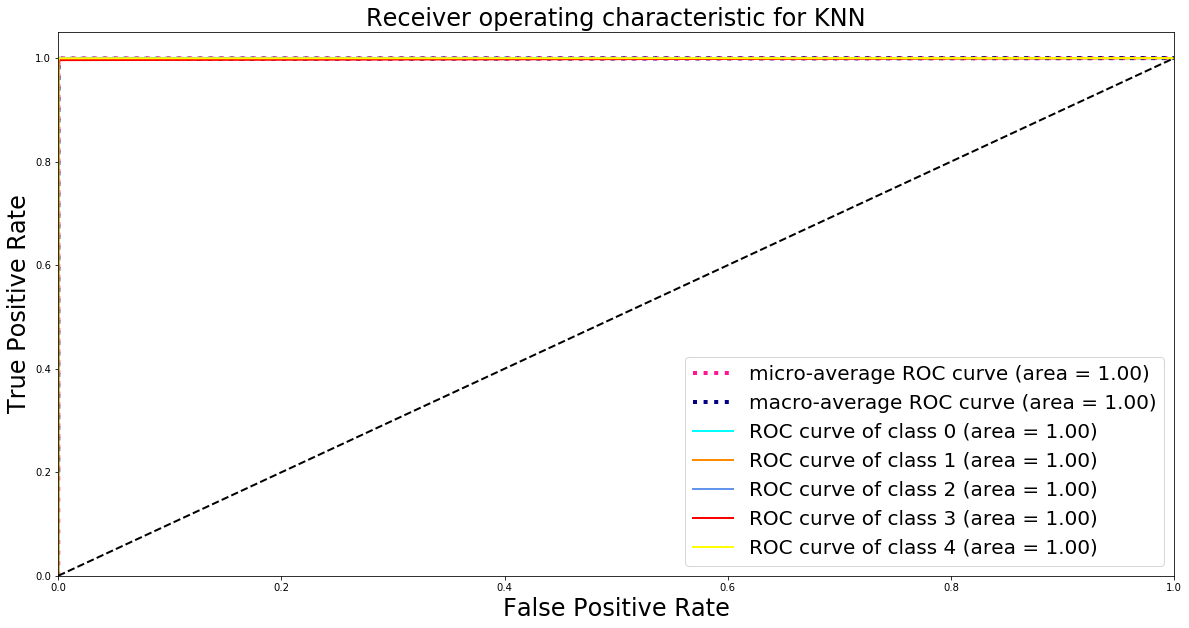

In [375]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Receiver operating characteristic for KNN',size=24)
plt.legend(loc="lower right", fontsize=20)
plt.show()

In [376]:
report=classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12552
           1       0.99      1.00      0.99      2962
           2       1.00      1.00      1.00     11775
           3       0.99      0.99      0.99      3038
           4       1.00      1.00      1.00     11073

   micro avg       1.00      1.00      1.00     41400
   macro avg       1.00      1.00      1.00     41400
weighted avg       1.00      1.00      1.00     41400
 samples avg       1.00      1.00      1.00     41400



In [377]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9980917874396136


In [379]:
multilabel_confusion_matrix(Y_test,Y_pred)

array([[[28844,     4],
        [    4, 12548]],

       [[38418,    20],
        [   14,  2948]],

       [[29605,    20],
        [   11, 11764]],

       [[38345,    17],
        [   38,  3000]],

       [[30313,    14],
        [   12, 11061]]], dtype=int64)

### Confusion matrix plot

In [395]:
x_vals1=data.copy()
x_vals1.drop(['user','class'],1,inplace=True)
y_vals1=data['class']
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x_vals1, y_vals1, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
model=clf.fit(X_train1, Y_train1)
Y_pred1=model.predict(X_test1)
Y_score1=model.predict_proba(X_test1)

In [396]:
cn_mat=confusion_matrix(Y_test1,Y_pred1) ## for regular output data, not binarize 

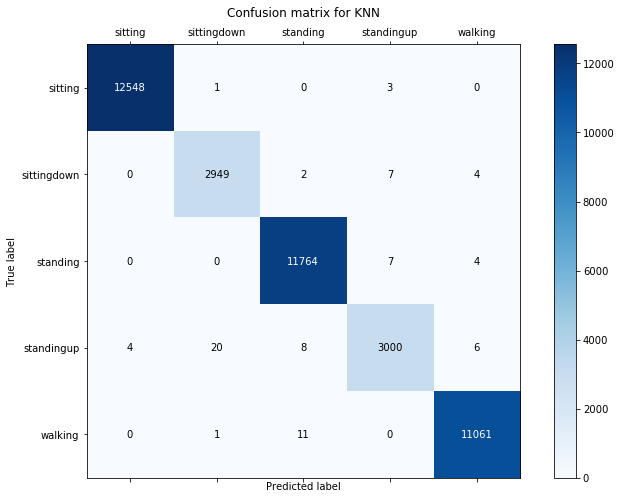

In [397]:
fig, ax = plt.subplots(figsize=(10,7))
cmap=plt.cm.Blues
im = ax.matshow(cn_mat, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
title = 'Confusion matrix for KNN'
ax.set(xticklabels=[" "]+class_names, yticklabels=[" "]+class_names,
       ylabel='True label',
       xlabel='Predicted label',title=title)
fmt = 'd' 
thresh = cn_mat.max() / 2.
for i in range(cn_mat.shape[0]):
    for j in range(cn_mat.shape[1]):
        ax.text(j, i, format(cn_mat[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

# LDA

In [380]:
clf = OneVsRestClassifier(LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001))
model=clf.fit(X_train, Y_train)  


C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [381]:
Y_pred=model.predict(X_test)
Y_score=model.predict_proba(X_test)

In [382]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

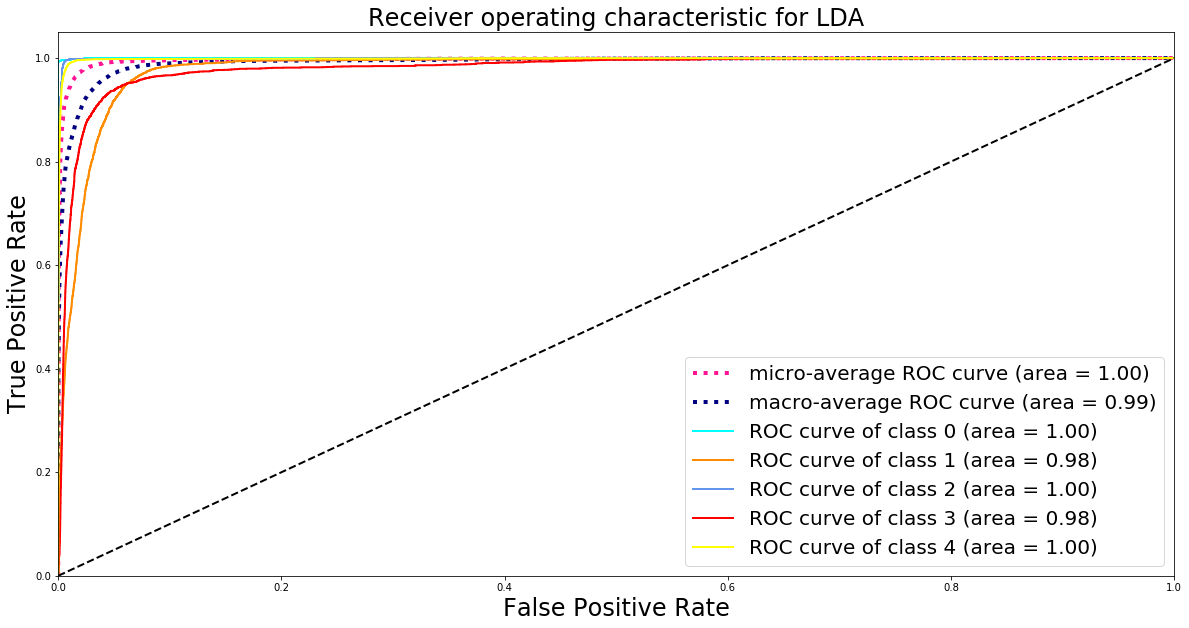

In [383]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Receiver operating characteristic for LDA',size=24)
plt.legend(loc="lower right", fontsize=20)
plt.show()

In [384]:
report=classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12552
           1       0.72      0.68      0.70      2962
           2       0.98      1.00      0.99     11775
           3       0.81      0.76      0.78      3038
           4       0.98      0.97      0.98     11073

   micro avg       0.95      0.95      0.95     41400
   macro avg       0.89      0.88      0.89     41400
weighted avg       0.95      0.95      0.95     41400
 samples avg       0.94      0.95      0.94     41400



C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [385]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9195410628019324


In [386]:
multilabel_confusion_matrix(Y_test,Y_pred)

array([[[28696,   152],
        [   42, 12510]],

       [[37643,   795],
        [  934,  2028]],

       [[29341,   284],
        [   33, 11742]],

       [[37809,   553],
        [  720,  2318]],

       [[30152,   175],
        [  288, 10785]]], dtype=int64)

# QDA

In [387]:
clf = OneVsRestClassifier(QuadraticDiscriminantAnalysis())
model=clf.fit(X_train, Y_train)

C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [388]:
Y_pred=model.predict(X_test)
Y_score=model.predict_proba(X_test)

In [389]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

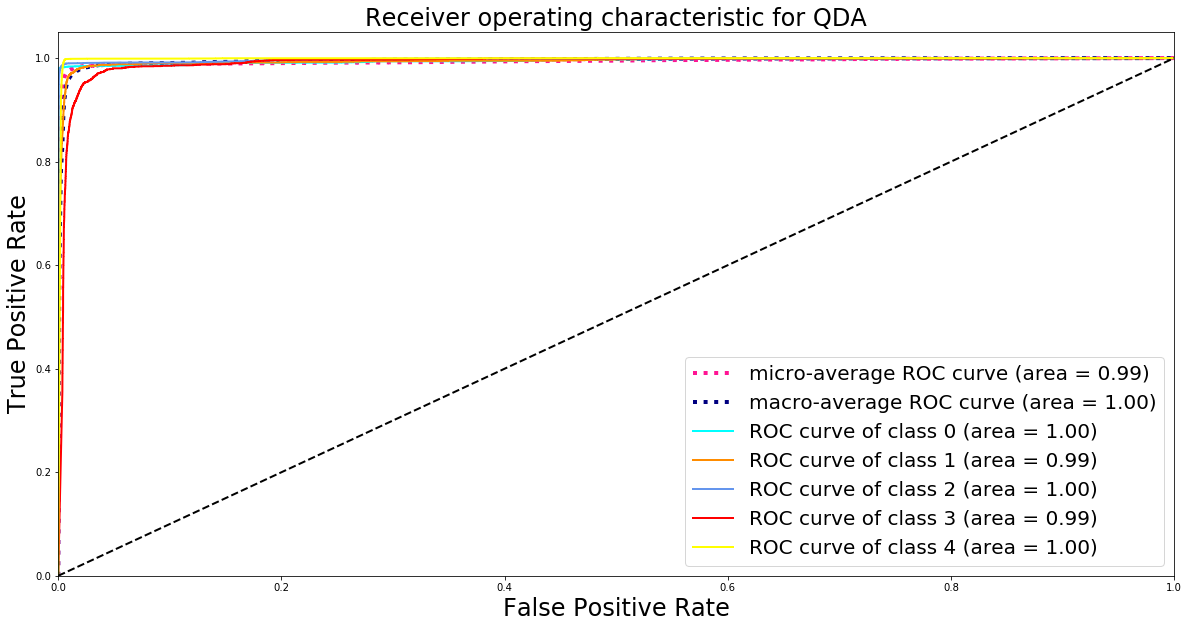

In [390]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(20,10))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',size=24)
plt.ylabel('True Positive Rate',size=24)
plt.title('Receiver operating characteristic for QDA',size=24)
plt.legend(loc="lower right", fontsize=20)
plt.show()

In [391]:
report=classification_report(Y_test, Y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12552
           1       0.75      0.98      0.85      2962
           2       1.00      0.97      0.98     11775
           3       0.82      0.92      0.87      3038
           4       0.98      1.00      0.99     11073

   micro avg       0.95      0.98      0.97     41400
   macro avg       0.91      0.97      0.93     41400
weighted avg       0.96      0.98      0.97     41400
 samples avg       0.96      0.98      0.97     41400



C:\Users\rezac\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [392]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9379951690821257
